In [52]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('E:\\Naresh IT\\Sample\\Salary_Data - Salary_Data.csv')

In [18]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [19]:
df.shape

(30, 2)

In [20]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [21]:
df.value_counts()

YearsExperience  Salary
1.1              39343     1
1.3              46205     1
10.3             122391    1
9.6              112635    1
9.5              116969    1
9.0              105582    1
8.7              109431    1
8.2              113812    1
7.9              101302    1
7.1              98273     1
6.8              91738     1
6.0              93940     1
5.9              81363     1
5.3              83088     1
5.1              66029     1
4.9              67938     1
4.5              61111     1
4.1              57081     1
4.0              56957     1
                 55794     1
3.9              63218     1
3.7              57189     1
3.2              64445     1
                 54445     1
3.0              60150     1
2.9              56642     1
2.2              39891     1
2.0              43525     1
1.5              37731     1
10.5             121872    1
dtype: int64

In [22]:
df['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [23]:
df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [24]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


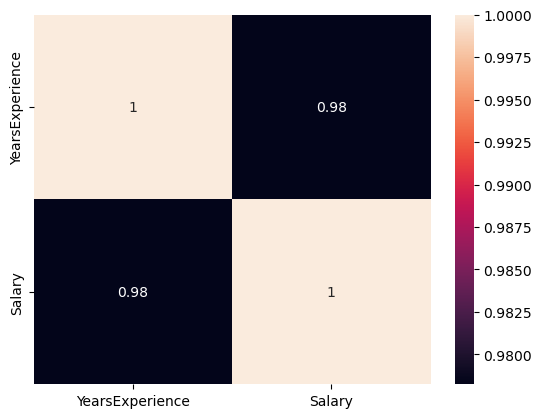

In [25]:
sns.heatmap(df.corr(),annot=True)
plt.show()

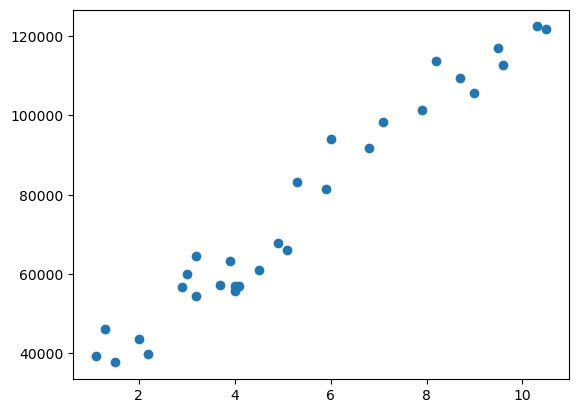

In [26]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.show()

In [27]:
X=df['YearsExperience']
y=df['Salary']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234,test_size=0.30)

In [29]:
X_train

13     4.1
22     7.9
24     8.7
0      1.1
2      1.5
27     9.6
26     9.5
18     5.9
5      2.9
16     5.1
25     9.0
11     4.0
9      3.7
17     5.3
29    10.5
20     6.8
12     4.0
21     7.1
6      3.0
19     6.0
15     4.9
Name: YearsExperience, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [31]:
X_train.array.reshape(-1,1)

<PandasArray>
[
[4.1],
[7.9],
[8.7],
[1.1],
[1.5],
[9.6],
[9.5],
[5.9],
[2.9],
[5.1],
[9.0],
[4.0],
[3.7],
[5.3],
[10.5],
[6.8],
[4.0],
[7.1],
[3.0],
[6.0],
[4.9]
]
Shape: (21, 1), dtype: float64

In [32]:
df.ndim

2

In [33]:
X_train.ndim

1

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train.array.reshape(-1,1),y_train)

LinearRegression()

In [35]:
y_pred=lr.predict(X_test.array.reshape(-1,1))
y_pred

array([ 55630.13259001,  62221.33017291,  46214.136043  ,  37739.7391507 ,
       122483.70807372,  55630.13259001,  44330.9367336 , 102710.11532501,
        67870.92810111])

In [36]:
y_test.values

array([ 54445,  63218,  39891,  46205, 122391,  64445,  43525, 113812,
        61111], dtype=int64)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score


In [38]:
r2=r2_score(y_test,y_pred)

In [39]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [40]:
#accuracy_score(y_test,y_pred)
print('R_squred',r2)
print('MSE',mse)
print('RMSE',rmse)

R_squred 0.949721948148016
MSE 40149896.466138825
RMSE 6336.39459520466


In [41]:
X=df['YearsExperience']
y=df['Salary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234,test_size=0.30)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train.array.reshape(-1,1),y_train)

y_pred=lr.predict(X_test.array.reshape(-1,1))
y_pred

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

#accuracy_score(y_test,y_pred)
print('R_squred',r2)
print('MSE',mse)
print('RMSE',rmse)

R_squred 0.949721948148016
MSE 40149896.466138825
RMSE 6336.39459520466


- Draw line on pred vs OG data

In [42]:
og_y_pred=lr.predict(X.array.reshape(-1,1))

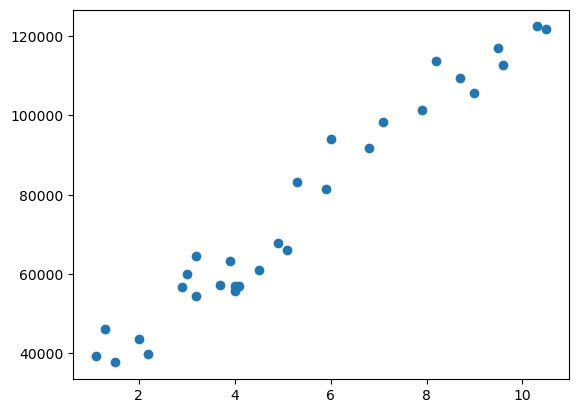

In [43]:
plt.scatter(X,y)

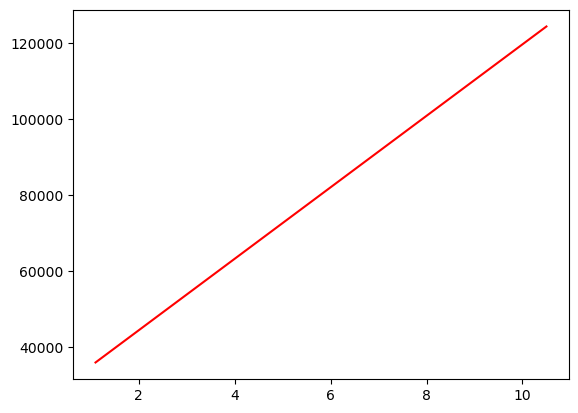

In [44]:
plt.plot(X,og_y_pred,color='red')

- Save the model

In [49]:
import pickle
pickle.dump(lr, open ('linear_sal_model','wb'))

In [51]:
import os
os.getcwd()

'C:\\Users\\Admin\\Documents\\NareshIT\\ML python'